In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [3]:
# 데이터 불러오기
df0 = pd.read_excel('가장_많이_이용하는_OTT_서비스의_주_이용_콘텐츠_1순위_20230611111228.xlsx')

# 2번째부터 12번째 열까지 삭제
df0.drop(df0.columns[2:13], axis=1, inplace=True)

# 첫 12개의 행을 추출하고 첫 번째 열을 제외
df0 = df0.iloc[:12, 1:]

# 첫 번째 행을 열 이름으로 설정
df0.columns = df0.iloc[0]
df0 = df0[1:]

# '구분별(2)' 열 이름을 '구분'으로 변경
df0.rename(columns={'구분별(2)':'구분'}, inplace=True)

# '구분' 열을 인덱스로 설정
df0 = df0.set_index('구분', inplace=False)

# 특정 행을 기준으로 컬럼의 순서를 값의 크기 순으로 정렬
row_index = 0  # 정렬 기준이 될 행의 인덱스
sorted_columns = df0.iloc[row_index].sort_values(ascending=False).index

# 데이터프레임에서 정렬된 컬럼 순서로 재배치
df0 = df0[sorted_columns]

# 열 이름을 더 간단하게 변경
df0.rename(columns={'예능/오락(개인방송 콘텐츠 포함) (%)':'예능/오락(개인방송 포함)', 
          '드라마 (%)':'드라마', 
          '영화 (%)':'영화', 
          '뉴스 (%)':'뉴스', 
          '스포츠 (%)':'스포츠', 
          '교양/다큐멘터리 (%)':'교양/다큐멘터리', 
          '애니메이션(만화) (%)':'애니메이션(만화)', 
          '교육/학습 (%)':'교육/학습', 
          '공연(콘서트, 연극, 뮤지컬 등) (%)':'공연', 
          '기타 (%)':'기타'}, inplace=True)

df0

c:\Users\7johs\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,예능/오락(개인방송 포함),드라마,영화,뉴스,스포츠,교양/다큐멘터리,애니메이션(만화),교육/학습,공연,기타
구분,,,,,,,,,,
소계,51.5,17.7,7.8,7.7,5.8,3.2,2.6,1.9,1.6,0.1
남,50.3,9.9,9.6,11.1,10.2,3.6,2.4,2,1,0.1
여,52.7,26,5.9,4.2,1.1,2.9,2.9,1.9,2.3,0.1
만10대미만,53.4,0,0,0,0,0,28.2,18.4,0,0
만10-19세,62.7,6.1,5,0.6,2,0.4,16.4,5.2,1.5,0
만20-29세,56.7,21.6,10.9,1.1,4.8,1.7,0.8,1.1,1.4,0
만30-39세,49.6,24.2,12.3,3.5,5.7,1.5,1.1,1.5,0.6,0
만40-49세,43.9,24.1,9.8,8.7,7.2,2.7,0.9,1.3,1.4,0.1
만50-59세,49,16.8,6.7,11.9,6.9,5.1,0.2,1.5,1.9,0.1


c:\Users\7johs\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_vals = vals.groupby(grouper)


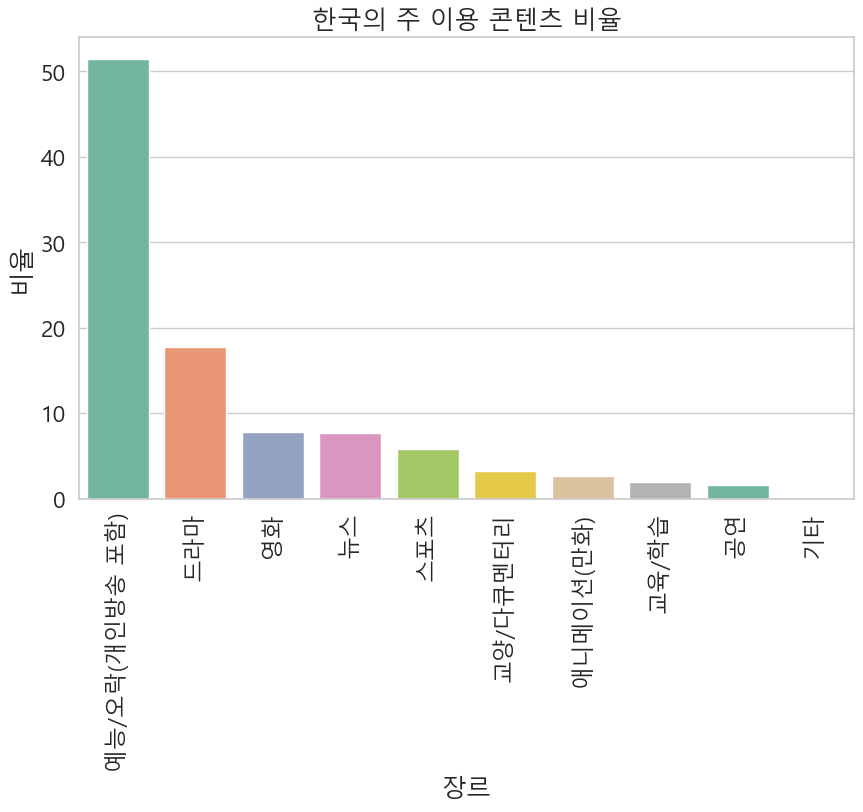

In [4]:
# 전체 데이터 추출
df_total = df0.loc['소계']
df_total = pd.DataFrame(df_total)

# 그래프 크기 조정
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
sns.barplot(x=df_total.index, y=df_total['소계'])
plt.xticks(rotation=90)

# 그래프 제목과 축 레이블 설정
plt.title('한국의 주 이용 콘텐츠 비율')
plt.xlabel('장르')
plt.ylabel('비율')

# 그래프 출력
plt.show()